# Project: Investigate a Dataset---Movie_data

# Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
#1. data substraction 
#load data
#See types, missing or errant data

In [3]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [7]:
# drop columns with duplicated or irrelvant information

In [8]:
df.drop(['id','imdb_id','homepage','tagline','overview','budget','revenue','vote_count','keywords','production_companies','cast','director'],axis=1,inplace=True)

In [9]:
df.head()

,popularity,original_title,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
#see if there's any missing values in the column

In [11]:
df.isnull().sum()

popularity         0
original_title     0
runtime            0
genres            23
release_date       0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [12]:
#drop the rows with missing values

In [13]:
df.dropna(axis=0,inplace=True)

In [14]:
df.isnull().sum().any()

False

In [15]:
#drop duplicates

In [16]:
df.duplicated().sum()

1

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10842 non-null float64
original_title    10842 non-null object
runtime           10842 non-null int64
genres            10842 non-null object
release_date      10842 non-null object
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 847.0+ KB


In [20]:
# save data to a new cleaner file

In [21]:
df.to_csv('tmdb_movie_1.csv',index=False)

In [22]:
# Fixing data types 

In [23]:

# Notice there's columns with '|' inside
# need to split those column in to new column with sigle values in them

In [24]:
df=pd.read_csv('tmdb_movie_1.csv')

In [25]:
df.head()

,popularity,original_title,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


In [26]:
# create a id column for future use

In [27]:
df['movie_id']=range(1,10843)

In [28]:
df.shape

(10842, 10)

In [29]:
# I find a function from stackflow that can split columns and write into new columns
#reference:https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows

In [30]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
        
        reference:https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [31]:
split_columns=['genres']

In [32]:
new_df=tidy_split(df, 'genres', sep='|', keep=False)

In [33]:
new_df.head(10)

,popularity,original_title,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj,movie_id
0,32.985763,Jurassic World,124,Action,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,1
0,32.985763,Jurassic World,124,Adventure,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,1
0,32.985763,Jurassic World,124,Science Fiction,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,1
0,32.985763,Jurassic World,124,Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,1
1,28.419936,Mad Max: Fury Road,120,Action,5/13/15,7.1,2015,1.379999e+08,3.481613e+08,2
1,28.419936,Mad Max: Fury Road,120,Adventure,5/13/15,7.1,2015,1.379999e+08,3.481613e+08,2
1,28.419936,Mad Max: Fury Road,120,Science Fiction,5/13/15,7.1,2015,1.379999e+08,3.481613e+08,2
1,28.419936,Mad Max: Fury Road,120,Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08,2
2,13.112507,Insurgent,119,Adventure,3/18/15,6.3,2015,1.012000e+08,2.716190e+08,3
2,13.112507,Insurgent,119,Science Fiction,3/18/15,6.3,2015,1.012000e+08,2.716190e+08,3


In [34]:
# new data frame with the splited column values
new_df.shape

(26955, 10)

In [35]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26955 entries, 0 to 10841
Data columns (total 10 columns):
popularity        26955 non-null float64
original_title    26955 non-null object
runtime           26955 non-null int64
genres            26955 non-null object
release_date      26955 non-null object
vote_average      26955 non-null float64
release_year      26955 non-null int64
budget_adj        26955 non-null float64
revenue_adj       26955 non-null float64
movie_id          26955 non-null int64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.3+ MB


In [36]:
#drop duplicates 
new_df.duplicated().sum()

0

In [37]:
new_df.shape

(26955, 10)

In [38]:
new_df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj,movie_id
count,26955.000000,26955.000000,26955.000000,26955.000000,2.695500e+04,2.695500e+04,26955.000000
mean,0.706112,102.800408,5.956535,2000.698423,2.103946e+07,6.088986e+07,5547.458208
std,1.114979,30.373314,0.911927,12.764378,3.820031e+07,1.615305e+08,3123.902537
min,0.000065,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000
25%,0.224628,90.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00,2845.500000
50%,0.411324,99.000000,6.000000,2005.000000,1.823126e+02,0.000000e+00,5560.000000
75%,0.774737,112.000000,6.600000,2011.000000,2.704173e+07,4.376460e+07,8278.500000
max,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,10842.000000


In [39]:
#save to a new data file 
new_df.to_csv('tmdb_movie_2.csv',index=False)

In [40]:
df=pd.read_csv('tmdb_movie_2.csv')

In [41]:
df.head()

,popularity,original_title,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj,movie_id
0,32.985763,Jurassic World,124,Action,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,1
1,32.985763,Jurassic World,124,Adventure,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,1
2,32.985763,Jurassic World,124,Science Fiction,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,1
3,32.985763,Jurassic World,124,Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,1
4,28.419936,Mad Max: Fury Road,120,Action,5/13/15,7.1,2015,1.379999e+08,3.481613e+08,2


In [42]:
df.nunique()

popularity        10791
original_title    10548
runtime             246
genres               20
release_date       5904
vote_average         72
release_year         56
budget_adj         2613
revenue_adj        4840
movie_id          10842
dtype: int64

In [43]:
# Fixing release_date from string to date type and create a column ‘release’

In [44]:
df['release']=pd.to_datetime(df['release_date'])

In [45]:
df.head()

,popularity,original_title,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj,movie_id,release
0,32.985763,Jurassic World,124,Action,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,1,2015-06-09
1,32.985763,Jurassic World,124,Adventure,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,1,2015-06-09
2,32.985763,Jurassic World,124,Science Fiction,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,1,2015-06-09
3,32.985763,Jurassic World,124,Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09,1,2015-06-09
4,28.419936,Mad Max: Fury Road,120,Action,5/13/15,7.1,2015,1.379999e+08,3.481613e+08,2,2015-05-13


In [46]:
df['month']=df['release_date'].apply(lambda x: x.split('/')[0]).astype(int)

In [47]:
df.drop(['release_date'],axis=1,inplace=True)

In [48]:
df.head()

,popularity,original_title,runtime,genres,vote_average,release_year,budget_adj,revenue_adj,movie_id,release,month
0,32.985763,Jurassic World,124,Action,6.5,2015,1.379999e+08,1.392446e+09,1,2015-06-09,6
1,32.985763,Jurassic World,124,Adventure,6.5,2015,1.379999e+08,1.392446e+09,1,2015-06-09,6
2,32.985763,Jurassic World,124,Science Fiction,6.5,2015,1.379999e+08,1.392446e+09,1,2015-06-09,6
3,32.985763,Jurassic World,124,Thriller,6.5,2015,1.379999e+08,1.392446e+09,1,2015-06-09,6
4,28.419936,Mad Max: Fury Road,120,Action,7.1,2015,1.379999e+08,3.481613e+08,2,2015-05-13,5


In [49]:
df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj,movie_id,month
count,26955.000000,26955.000000,26955.000000,26955.000000,2.695500e+04,2.695500e+04,26955.000000,26955.000000
mean,0.706112,102.800408,5.956535,2000.698423,2.103946e+07,6.088986e+07,5547.458208,6.832721
std,1.114979,30.373314,0.911927,12.764378,3.820031e+07,1.615305e+08,3123.902537,3.435445
min,0.000065,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,0.224628,90.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00,2845.500000,4.000000
50%,0.411324,99.000000,6.000000,2005.000000,1.823126e+02,0.000000e+00,5560.000000,7.000000
75%,0.774737,112.000000,6.600000,2011.000000,2.704173e+07,4.376460e+07,8278.500000,10.000000
max,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,10842.000000,12.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11236b320>,
      dtype=object)

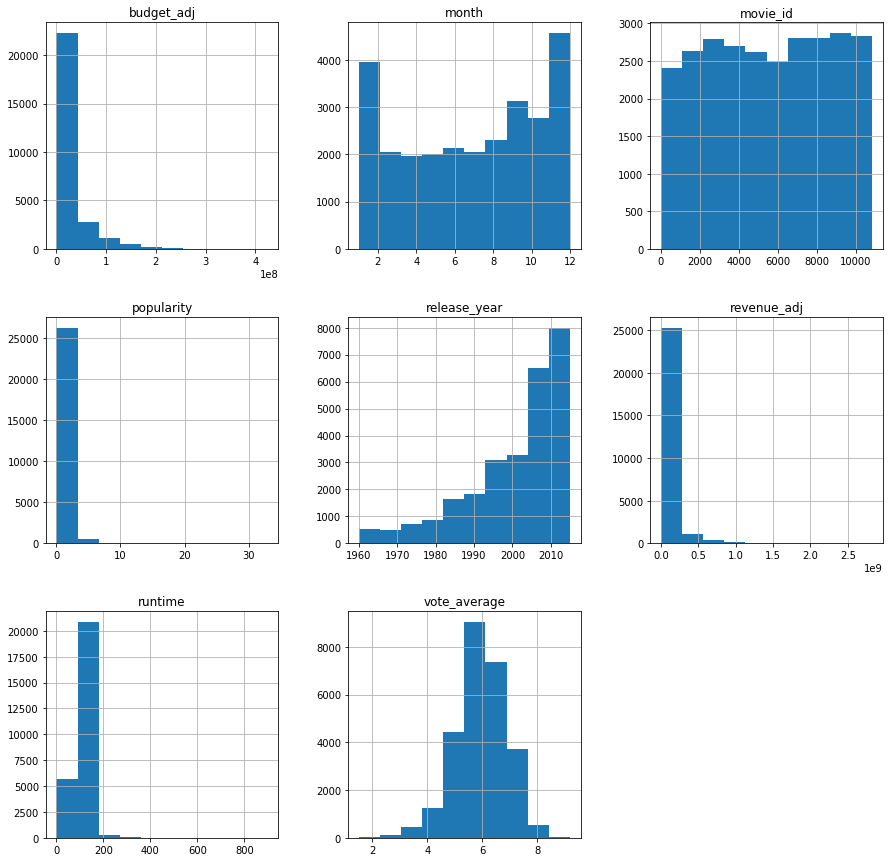

In [50]:
df.hist(figsize=(15,15))

# Research question 1 
# Find out if there's any correlation between revenue and other properties

There’s no correlation coefficient between revenue and runtime, month, year. There’s weak correlation coefficient between revenue and vote_average. There’s strong positive correlation coefficient between revenue and popularity, budget.

In [51]:
df['revenue_adj'].corr(df['runtime'])

0.18699103805927922

In [52]:
df['revenue_adj'].corr(df['popularity'])
# There's some positive association between revenue and popularity

0.6103010130920747

In [53]:
df['revenue_adj'].corr(df['budget_adj'])
# There's some positive association between revenue and budget

0.6434957098664074

In [54]:
df['revenue_adj'].corr(df['month'])

0.049435971024836566

In [55]:
df['revenue_adj'].corr(df['release_year'])

-0.04743326863633413

In [56]:
df['revenue_adj'].corr(df['vote_average'])

0.21671242731145762

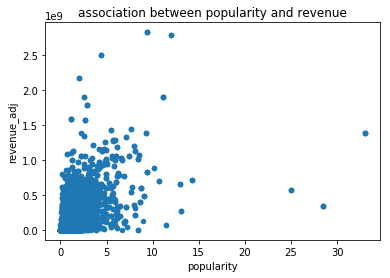

In [128]:
# Scatter plot for popularity and revenue
df.plot(x='popularity',y='revenue_adj',title='association between popularity and revenue',kind='scatter')

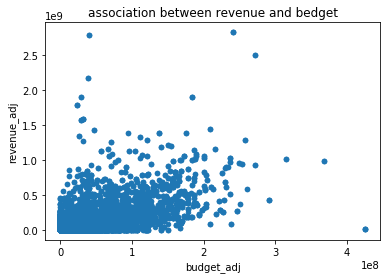

In [127]:
# Scatter plot for budget and revunue
df.plot(x='budget_adj',y='revenue_adj',title='association between revenue and bedget',kind='scatter')


# Research Question 2 
# find out the realtionship between genres and popularity over time

From 1960-2015: The most popular genes are Adventure, Science Fiction( average popularity >1). The second most popular genres are Fantasy, Action, Animation,Family( 0.77<average popularity<1) The middle popular genres are Crime ,Thriller, War. ( 0.6<average popularity<0.77) The second least popular genres are Mystery, Comedy, Romance, Drama, Western, History, Music, Horror. ( 0.3<average popularity<0.6) The least popular genres are TV movie, Foreign, Documentary. ( average popularity<0.27)

In [59]:
df_genres=df.groupby('genres')['popularity'].mean()

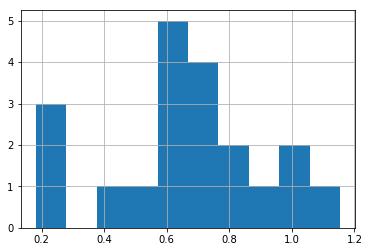

In [60]:
df_genres.hist()

Text(0,0.5,'popularity')

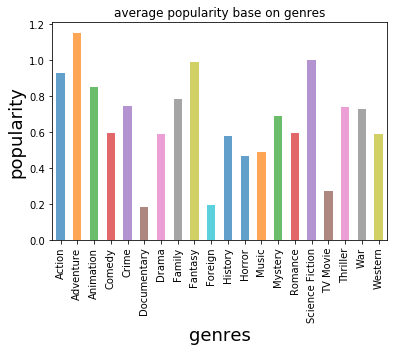

In [61]:
# Average popularity base on genres from 1960-2015

df_genres.plot(kind='bar',title='average popularity base on genres',alpha=.7)
plt.xlabel('genres',fontsize=18)
plt.ylabel('popularity',fontsize=18)

In [62]:
#  This is  the average popularity rank for each genres from 1960-2015

df_genres.sort_values()

genres
Documentary        0.181432
Foreign            0.191496
TV Movie           0.270896
Horror             0.465357
Music              0.487321
History            0.575936
Western            0.590615
Drama              0.591495
Romance            0.592082
Comedy             0.592607
Mystery            0.690012
War                0.727683
Thriller           0.741563
Crime              0.744930
Family             0.786668
Animation          0.852182
Action             0.926274
Fantasy            0.992840
Science Fiction    1.001548
Adventure          1.154259
Name: popularity, dtype: float64

In [63]:
# Find out the relationship between genres and time 
# from 1960-2015 , I'll cut them into 5 decades 
# 1960-1975, 1976-1985, 1986-1995, 1996-2005,2006-2015
# df_decade1, df_decade2, df_decade3, .....df_decade5

In [64]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [1959 ,1975 ,1985 ,1995 ,2005,2015 ] # Fill in this list with five values you just found

In [65]:
# Labels for the four acidity level groups
bin_names = ['1960-1975' ,'1976-1985' ,'1986-1995' ,'1996-2005','2006-2015'] # Name each acidity level category

In [66]:
df['decade']=pd.cut(df['release_year'], bin_edges, labels=bin_names)

In [67]:
df.head()

,popularity,original_title,runtime,genres,vote_average,release_year,budget_adj,revenue_adj,movie_id,release,month,decade
0,32.985763,Jurassic World,124,Action,6.5,2015,1.379999e+08,1.392446e+09,1,2015-06-09,6,2006-2015
1,32.985763,Jurassic World,124,Adventure,6.5,2015,1.379999e+08,1.392446e+09,1,2015-06-09,6,2006-2015
2,32.985763,Jurassic World,124,Science Fiction,6.5,2015,1.379999e+08,1.392446e+09,1,2015-06-09,6,2006-2015
3,32.985763,Jurassic World,124,Thriller,6.5,2015,1.379999e+08,1.392446e+09,1,2015-06-09,6,2006-2015
4,28.419936,Mad Max: Fury Road,120,Action,7.1,2015,1.379999e+08,3.481613e+08,2,2015-05-13,5,2006-2015


In [68]:
counts=df.groupby(['decade','genres']).count()['movie_id']

In [69]:
counts

decade     genres         
1960-1975  Action              149
           Adventure           101
           Animation            25
           Comedy              179
           Crime               102
           Documentary          10
           Drama               302
           Family               56
           Fantasy              37
           Foreign              10
           History              43
           Horror               98
           Music                33
           Mystery              65
           Romance              96
           Science Fiction      69
           TV Movie              6
           Thriller            145
           War                  43
           Western              63
1976-1985  Action              193
           Adventure           142
           Animation            23
           Comedy              246
           Crime                92
           Documentary          11
           Drama               317
           Family           

In [70]:
df.groupby('decade').count()

,popularity,original_title,runtime,genres,vote_average,release_year,budget_adj,revenue_adj,movie_id,release,month
decade,,,,,,,,,,,
1960-1975,1632,1632,1632,1632,1632,1632,1632,1632,1632,1632,1632
1976-1985,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974
1986-1995,3945,3945,3945,3945,3945,3945,3945,3945,3945,3945,3945
1996-2005,6634,6634,6634,6634,6634,6634,6634,6634,6634,6634,6634
2006-2015,12770,12770,12770,12770,12770,12770,12770,12770,12770,12770,12770


The movie_data that collected were not evenly distributed,there are more than 12000 movie data from 2006-2015, about 6000 from 1996-2005, and about 4000 from 1986-1995, less than 2000 each from 1960-1985. 

In [71]:
totals=df.groupby('decade').count()['movie_id']

In [72]:
proportions = counts/totals

In [73]:
proportions

decade     genres         
1960-1975  Action             0.091299
           Adventure          0.061887
           Animation          0.015319
           Comedy             0.109681
           Crime              0.062500
           Documentary        0.006127
           Drama              0.185049
           Family             0.034314
           Fantasy            0.022672
           Foreign            0.006127
           History            0.026348
           Horror             0.060049
           Music              0.020221
           Mystery            0.039828
           Romance            0.058824
           Science Fiction    0.042279
           TV Movie           0.003676
           Thriller           0.088848
           War                0.026348
           Western            0.038603
1976-1985  Action             0.097771
           Adventure          0.071935
           Animation          0.011651
           Comedy             0.124620
           Crime              0.04660

In [74]:
# Use this function to find out genres count comparison for each decade

def proportion_gen(decade):
    d_year=df[df['decade']==decade].copy()
    count=d_year.groupby('genres').count()['movie_id']
    total=sum(count)
    proportion=count/total
    proportion.plot(kind='bar',title='proporty by genres'+' '+decade,alpha=.7)
    plt.xlabel('quality and color',fontsize=18)
    plt.ylabel('quality and color',fontsize=18)

And the proportions of genres for movies:
From 2006-2015
The most genres of movies are drama, comedy, thriller, action.
From 1996-2005
The most genres of movies are drama, comedy, thriller, action
From 1986-1995 
The most genres of movies are drama, comedy, action, thriller 
From 1976-1985 
The most genres of movies are drama, comedy, action, thriller 
From 1960-1975 
The most genres of movies are drama, comedy, action, thriller.


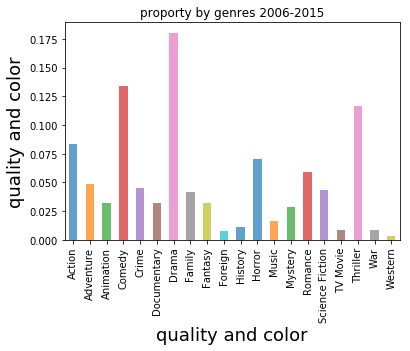

In [75]:
proportion_gen('2006-2015')

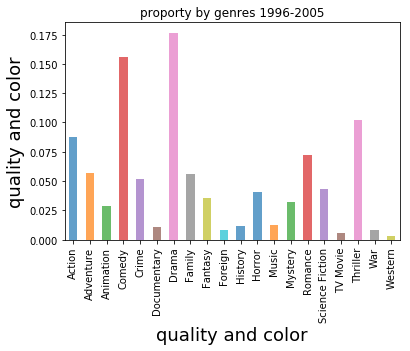

In [76]:
proportion_gen('1996-2005')

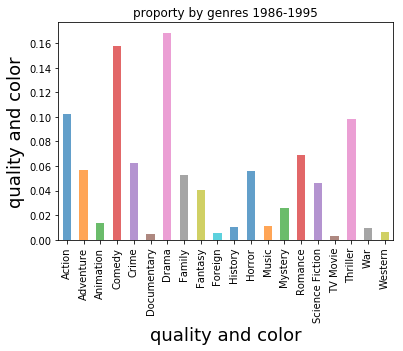

In [77]:
proportion_gen('1986-1995')

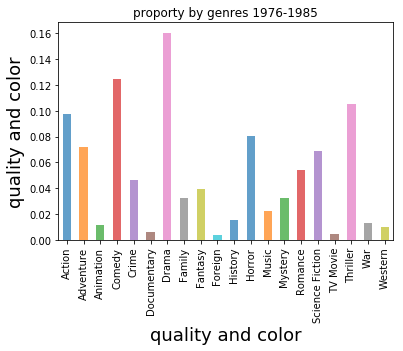

In [78]:
proportion_gen('1976-1985')

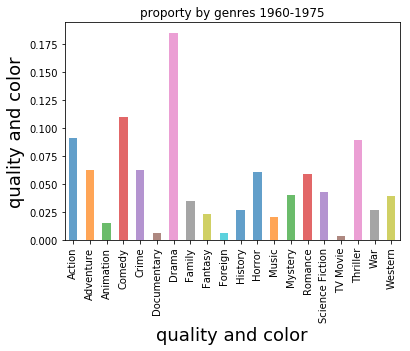

In [79]:
proportion_gen('1960-1975')

In [80]:
# This function is used to show genres popularity for each decade

2006-2015
The most popular genres are adventure, science fiction, western, fantasy, action.
1996-2005
The most popular genres are fantasy, adventure, action, science fiction.animation.
1986-1995 
The most popular genres are animation, adventure, fantasy, comedy, family.
1976-1985 
The most popular genres are adventure, science fiction, action, family, fantasy.
1960-1975 
The most popular genres are animation, adventure, family, crime, thriller. 


In [81]:
def decade_gen(decade):
    df_new=df[df['decade']==decade].copy()
    df_new=df_new.groupby('genres')['popularity'].mean()
    df_new.plot(kind='bar',title='popularity by genres'+' '+decade,alpha=.7)
    plt.xlabel('genres',fontsize=18)
    plt.ylabel('popularity',fontsize=18)

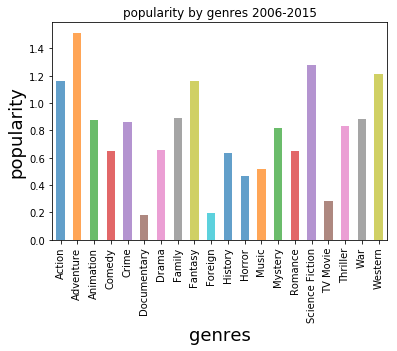

In [82]:
decade_gen('2006-2015')

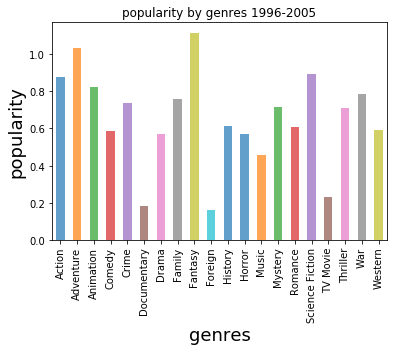

In [83]:
decade_gen('1996-2005')

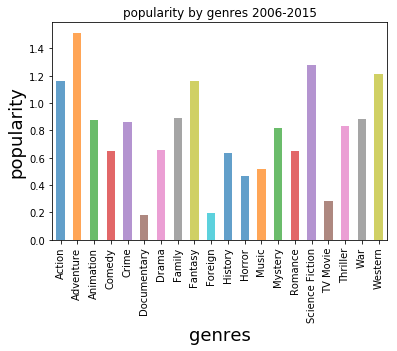

In [84]:
decade_gen('2006-2015')

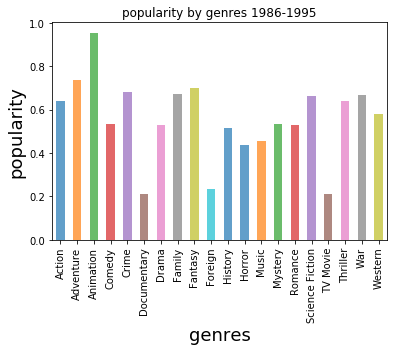

In [85]:
decade_gen('1986-1995')

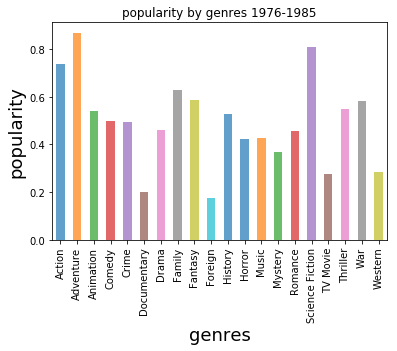

In [86]:
decade_gen('1976-1985')

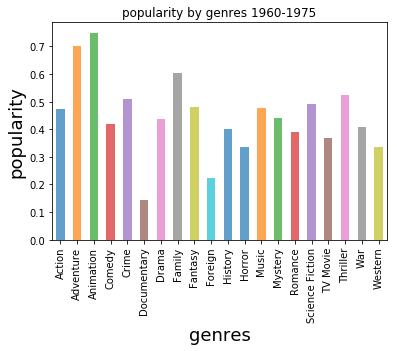

In [87]:
decade_gen('1960-1975')

In [88]:
# This graph function is used to show each genre's popularity change over decades 

In [89]:
def gen_graph(genres):
    d_new=df[df['genres']==genres].copy()
    d_new=d_new.groupby('decade')['popularity'].mean()
    d_new.plot(kind='bar',title= genres+' '+'movie popularity by decade',alpha=.7)
    plt.xlabel('decade',fontsize=18)
    plt.ylabel('popularity',fontsize=18)

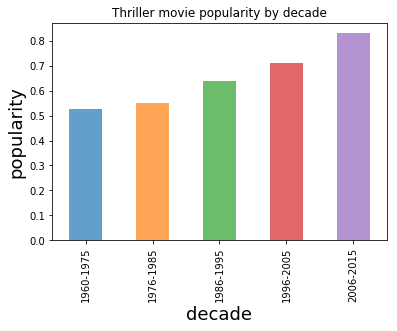

In [90]:
gen_graph('Thriller')

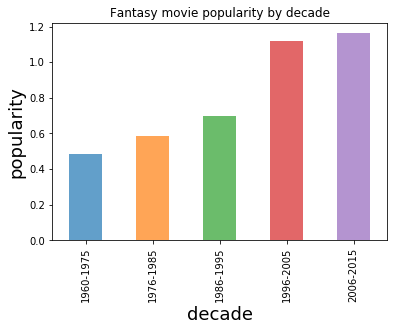

In [91]:
gen_graph('Fantasy')

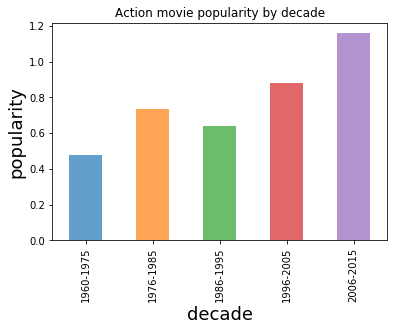

In [92]:
gen_graph('Action')

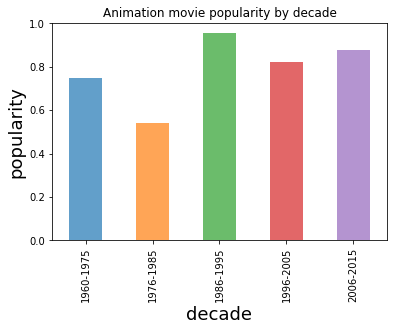

In [93]:
gen_graph('Animation')

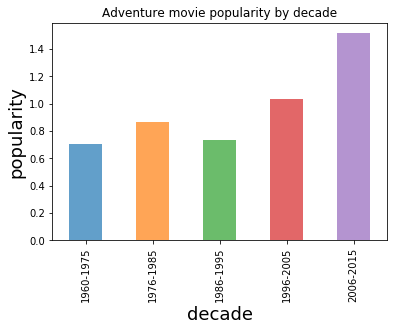

In [94]:
gen_graph('Adventure')

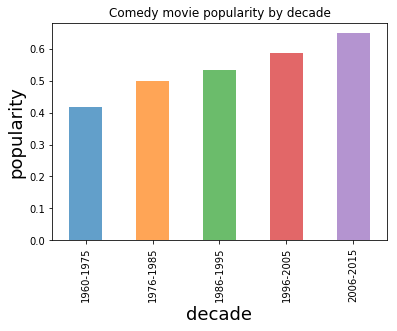

In [95]:
gen_graph('Comedy')

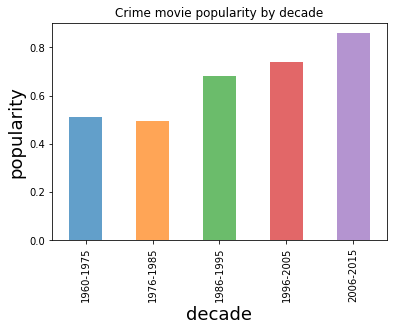

In [96]:
gen_graph('Crime')

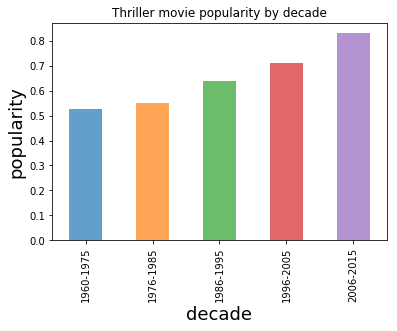

In [97]:
gen_graph('Thriller')

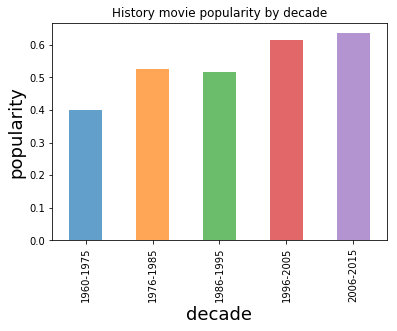

In [98]:
gen_graph('History')

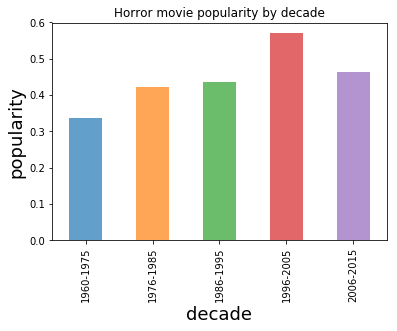

In [99]:
gen_graph('Horror')

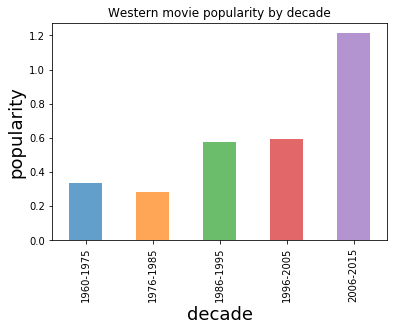

In [100]:
gen_graph('Western')

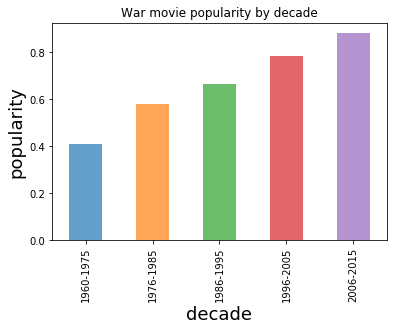

In [101]:
gen_graph('War')

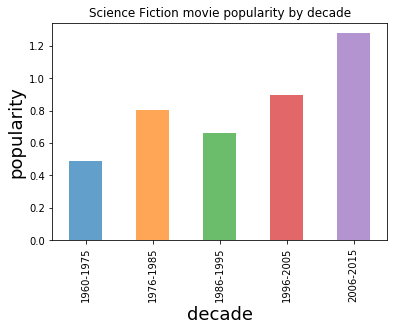

In [102]:
gen_graph('Science Fiction')

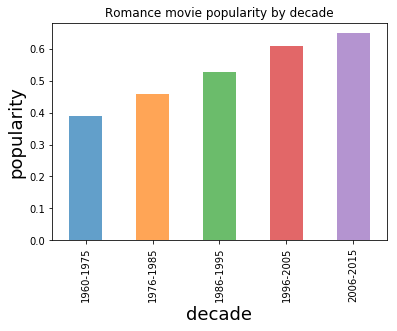

In [103]:
gen_graph('Romance')

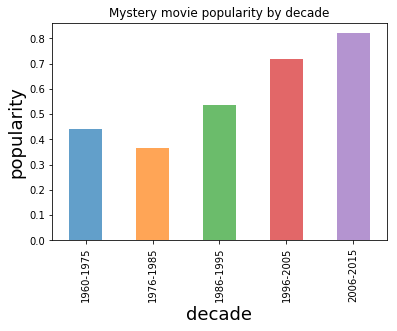

In [104]:
gen_graph('Mystery')

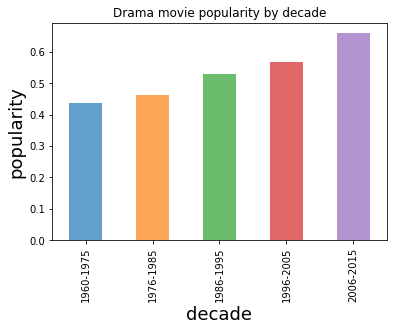

In [105]:
gen_graph('Drama')

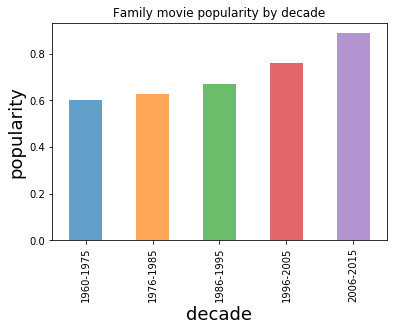

In [106]:
gen_graph('Family')

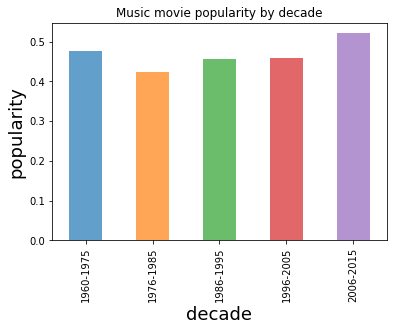

In [107]:
gen_graph('Music')

In [108]:
# I notice that the mean popularity is higher in the later decades for most of the genres.

Text(0,0.5,'popularity')

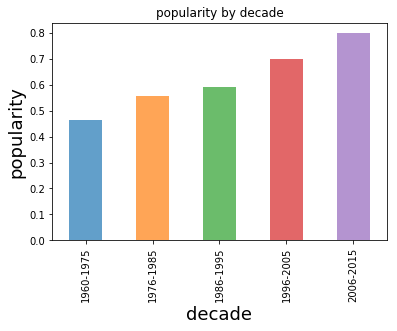

In [109]:
# The average movie popularity through decades
df_time=df.groupby('decade')['popularity'].mean()
df_time.plot(kind='bar',title='popularity by decade',alpha=.7)
plt.xlabel('decade',fontsize=18)
plt.ylabel('popularity',fontsize=18)

The mean of the popularity number is going up over time.

In [110]:
# Relative popularity change over time for each genres
# Relative genres popularity=each genres average popularity/ average popularity of the decade

def gen_rela(genres):
    df_time=df.groupby('decade')['popularity'].mean()
    d_new=df[df['genres']==genres].copy()
    d_new=d_new.groupby('decade')['popularity'].mean()
    d_relative=d_new/df_time
    d_relative.plot(kind='bar',title= genres+' '+'movie popularity by decade',alpha=.7)
    plt.xlabel('decade',fontsize=18)
    plt.ylabel('popularity',fontsize=18)

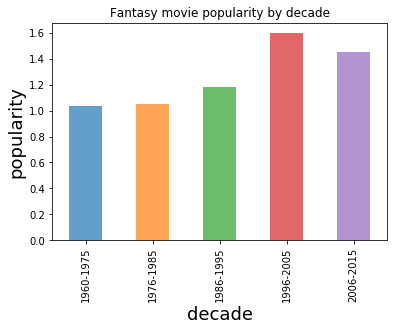

In [111]:
gen_rela('Fantasy')

Fantasy RGP from  highest to lowest is1996-2005, then 2006-2015, then 1986-1995,

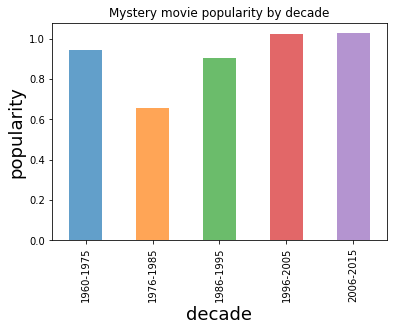

In [112]:
gen_rela('Mystery')

Mystery RGP from highest to lowest is 1996-2005, 2006-2015, then 1986-1995, 1960-1975 then 1976-1985.

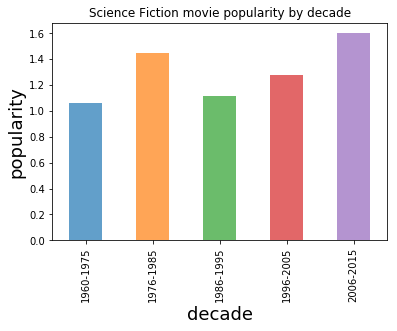

In [113]:
gen_rela('Science Fiction')

Science fiction RGP from highest to lowest is 2006-2015,1976-1985,1996-2005,1986-1995,1960-1975.

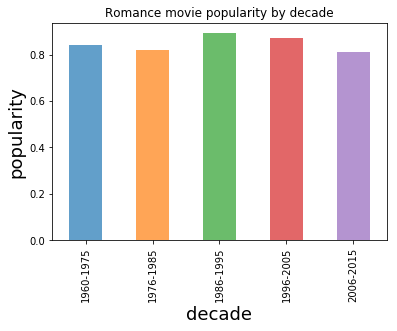

In [114]:
gen_rela('Romance')

Romance RGP from highest to lowest is 1986-1995,1996-2005,1960-1975,1976-1985,2006-2015.

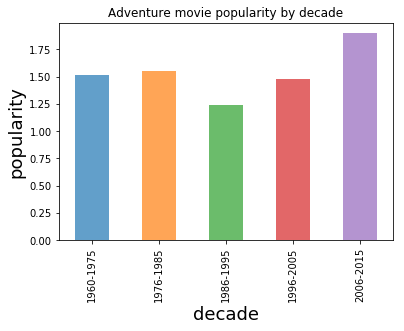

In [115]:
gen_rela('Adventure')

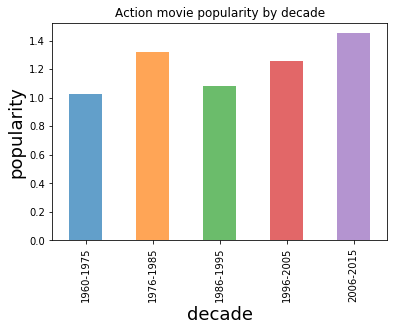

In [116]:
gen_rela('Action')

Action RGP from highest to lowest is 2006-2015,1976-1985,1996-2005,1996-1995,1960-1975.

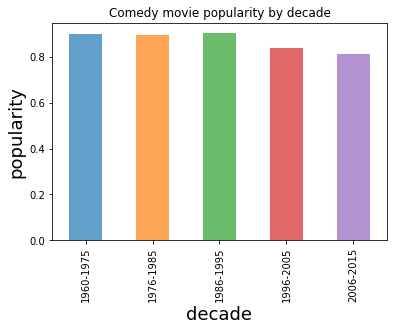

In [117]:
gen_rela('Comedy')

Comedy RGP from highest to lowest is 1960-1995, 1966-2005,2006-2015.

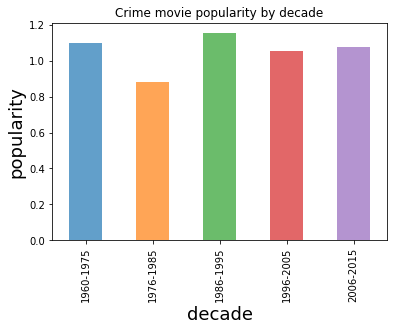

In [118]:
gen_rela('Crime')

Crime RGP from highest to lowest is 1986-1995,1960-1975,2006-2015,1996-2005,1976-1985.

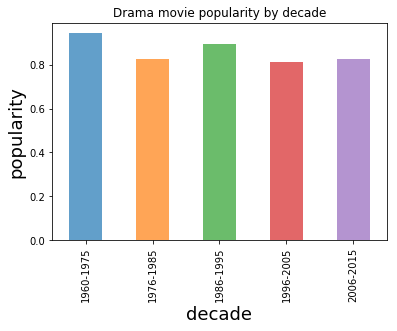

In [119]:
gen_rela('Drama')

Drama RGP from highest to lowest is 1960-1975,1986-1995,1976-1985,2006-2015,1996-2005.

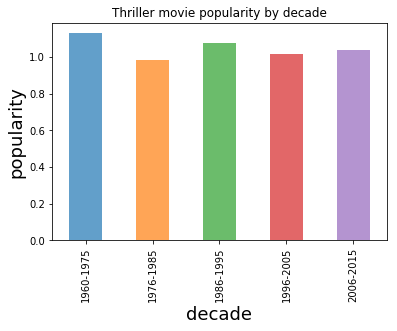

In [120]:
gen_rela('Thriller')

Thriller RGP from highest to lowest is 1960-1975,1986-1995,2006-2015,1996-2005,1976-1985.

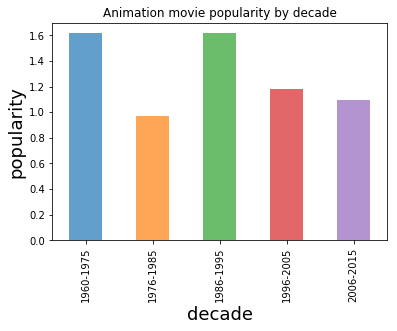

In [121]:
gen_rela('Animation')

Animation RGP from highest to lowest is 1986-1995, 1960-1975, 1996-2005, 2006-2015, 1976-1985.

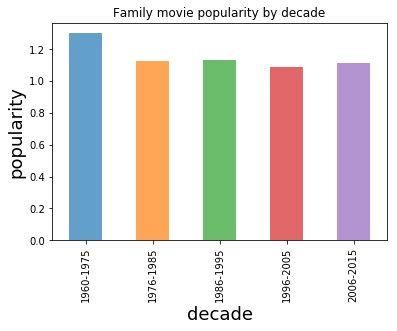

In [122]:
gen_rela('Family')

Family RGP from highest to lowest is 1960-1975,1986-1995,1976-1985,2006-2015,1996-2005.

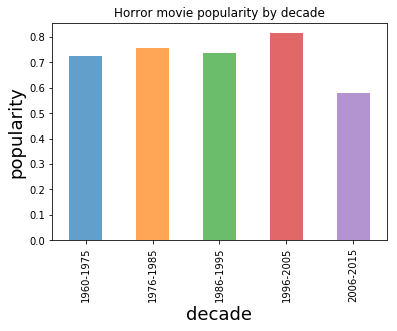

In [123]:
gen_rela('Horror')

Horror RGP from highest to lowest is 1996-2005,1976-1985,1986-1995,1960-1975,2006-2015.

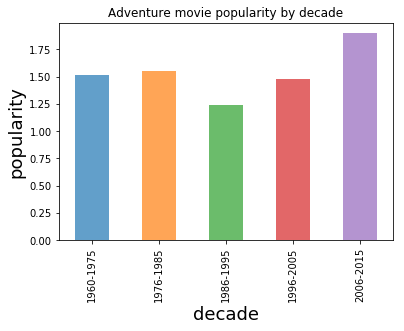

In [124]:
gen_rela('Adventure')

Adventure RGP from highest to lowest  is 2006-2015, 1976-1985, 1960-1975, 1996-2005, 1986-1995.

# Conclusions

Before any conclusion I noticed some data lmitations:
1. I dropped the rows with missing values and that might case bias for data analysis result. 

2. The movie_data that collected were not evenly distributed,there are more than 12000 movie data from 2006-2015, about 6000 from 1996-2005, and about 4000 from 1986-1995, less than 2000 each from 1960-1985, which could also case data bias.

3. The mean of the popularity number is going up over time, which might case result favor to the movies that are more recent. 

Conclusions:
For question 1:
There’s no correlation coefficient between revenue and runtime, month, year.(cc<0.2)
There’s weak correlation coefficient between revenue and vote_average.(cc:0.2~0.4)
There’s strong positive correlation coefficient between revenue and popularity, budget.(cc>0.6)

For question 2:

So for the whole dataset we have, from 1960-2015: 
The most popular genes are Adventure, Science Fiction( average popularity >1).
The second most popular genres are Fantasy, Action, Animation,Family( 0.77<average popularity<1)
The middle popular genres are Crime ,Thriller, War. ( 0.6<average popularity<0.77)
The second least popular genres are Mystery, Comedy, Romance, Drama, Western, History, Music, Horror. ( 0.3<average popularity<0.6)
The least popular genres are TV movie, Foreign, Documentary. ( average popularity<0.27)

But we have a lot more data from 2006-2015 and 1996-2005 then previous generation I plot histgram show in each decade how the gerens are distributed:
2006-2015
The most popular genres are adventure, science fiction, western, fantasy, action.
1996-2005
The most popular genres are fantasy, adventure, action, science fiction.animation.
1986-1995 
The most popular genres are animation, adventure, fantasy, comedy, family.
1976-1985 
The most popular genres are adventure, science fiction, action, family, fantasy.
1960-1975 
The most popular genres are animation, adventure, family, crime, thriller. 

And the proportions of genres for movies:
From 2006-2015
The most genres of movies are drama, comedy, thriller, action.
From 1996-2005
The most genres of movies are drama, comedy, thriller, action
From 1986-1995 
The most genres of movies are drama, comedy, action, thriller 
From 1976-1985 
The most genres of movies are drama, comedy, action, thriller 
From 1960-1975 
The most genres of movies are drama, comedy, action, thriller.

But this conclusion are based on the popularity number, which I mentioned on the previous data limitations, certain genres are more popular might because they're from the recent decade. From the bar chart, they showed that the more recent dacade had relavtively higher popularity score;The mean popularity is higher in the later decades for most of the genres.

So I decided to calculate the The relative genres popularity(RGP) change over time
( relative genres popularity= each genres average popularity/ average popularity of the decade)

Fantasy RGP from  highest to lowest is1996-2005, then 2006-2015, then 1986-1995,
Mystery RGP from highest to lowest is 1996-2005, 2006-2015, then 1986-1995, 1960-1975 then 1976-1985.
Adventure RGP from highest to lowest  is 2006-2015, 1976-1985, 1960-1975, 1996-2005, 1986-1995.
Animation RGP from highest to lowest is 1986-1995, 1960-1975, 1996-2005, 2006-2015, 1976-1985.
Science fiction RGP from highest to lowest is 2006-2015,1976-1985,1996-2005,1986-1995,1960-1975.
Action RGP from highest to lowest is 2006-2015,1976-1985,1996-2005,1996-1995,1960-1975.
Family RGP from highest to lowest is 1960-1975,1986-1995,1976-1985,2006-2015,1996-2005.
Horror RGP from highest to lowest is 1996-2005,1976-1985,1986-1995,1960-1975,2006-2015.
Thriller RGP from highest to lowest is 1960-1975,1986-1995,2006-2015,1996-2005,1976-1985.
Drama RGP from highest to lowest is 1960-1975,1986-1995,1976-1985,2006-2015,1996-2005.
Crime RGP from highest to lowest is 1986-1995,1960-1975,2006-2015,1996-2005,1976-1985.
Comedy RGP from highest to lowest is 1960-1995, 1966-2005,2006-2015.
Romance RGP from highest to lowest is 1986-1995,1996-2005,1960-1975,1976-1985,2006-2015.

In [129]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0